<center>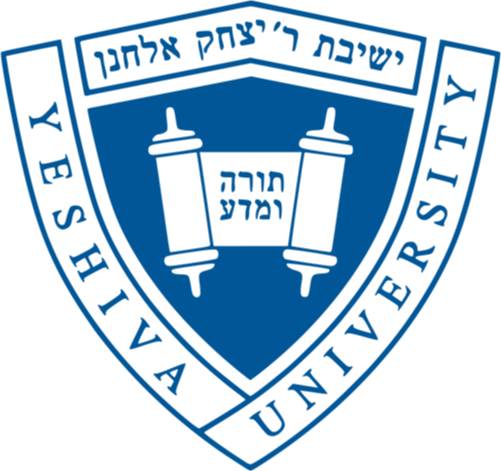</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5004 Predictive Models</h1>
<p>
<h2 style='text-align: center;'>Homework 03</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Task #1
### Exercise 6.8 (from Fox 2016) Examples of specification error (also see the discussion in Section 9.7):

### <b>(a)</b> Describe a nonexperimental research situation—real or contrived—in which failure to control statistically for an omitted variable induces a correlation between the error and an explanatory variable, producing erroneous conclusions. (For example: An educational researcher discovers that university students who study more get lower grades on average; the researcher concludes that studying has an adverse effect on students’ grades.)

There can be a situation where researchers want to analyze the relationship between a person's income and their level of happiness. The question in this study could be to report the income and level of happiness on a scale of one to ten. The study shows a negative correlation between income and happiness, indicating that as income increases, happiness decreases. However, the researchers fail to control for an important omitted variable, such as the participant's level of job satisfaction. It may be the case that individuals with higher incomes are more likely to have high-stress jobs that lead to lower levels of job satisfaction and, in turn, lower levels of happiness. Without controlling for this omitted variable, the researchers' conclusion that higher income leads to lower happiness would be inaccurate.

### <b>(b)</b> Describe an experiment—real or contrived—in which faulty experimental practice induces an explanatory variable to become correlated with the error, compromising the validity of the results produced by the experiment. (For example: In an experimental study of a promising new therapy for depression, doctors administering the treatments tend to use the new therapy with patients for whom more traditional approaches have failed; it is discovered that subjects receiving the new treatment tend to do worse, on average, than those receiving older treatments or a placebo; the researcher concludes that the new treatment is not effective.)

I can imagine a situation where researchers investigate the effects of a new memory-enhancing drug on cognitive performance. In the study, participants are randomly assigned to either a treatment group (receives the new drug) or a control group (recieves a placebo). However, the study involves a problematic experimental practice: the researchers unintentionally select participants with higher cognitive abilities for the treatment group and those with lower cognitive abilities for the control group. As a result, the explanatory variable of pre-existing cognitive ability becomes correlated with the error, affecting the validity of the results produced by the experiment. The researchers' conclusion that the new drug enhances memory would be compromised as it is not clear whether the difference in performance is due to the drug or to pre-existing differences in cognitive ability.

### <b>(c)</b> Is it fair to conclude that a researcher is never able absolutely to rule out the possibility that an explanatory variable of interest is correlated with the error? Is experimental research no better than observational research in this respect? Explain your answer.

While there are challenges for a researcher to completely rule out the possibility of an explanatory variable being correlated with the error, experimental research is generally better than observational research in this respect. In an experimental research, the researchers have more control over the environment and can manipulate the independent variable to isolate its effects, reducing the chances for confounding variables. However, experimental research can still be subject to other sources of error, such as measurement or sampling error. Therefore, it is important for researchers to be aware of and control for potential confounding variables and sources of error in both experimental and observational studies.

# Task #2
### Exercise D5.2 Analyze Sahlins's data, given in sahlins.txt, by regressing Acres/Gardener on Consumers/Gardener. In a society characterized by 'primitive communism,' the social product of the village would be redistributed according to need, while each household would work in proportion to its capacity, implying a regression slope of zero. In contrast, in a society in which redistribution is purely through the market, each household should have to work in proportion to its consumption needs, suggesting a positive regression slope and an intercept of zero. Interpret the results of the regression in light of these observations. Examine and interpret the values of $A$, $B$, $S_E$, and $r$ (or $r^2$). Do the results change if the fourth household is deleted? Plot the regression lines calculated with and without the fourth household on a scatterplot of the data. Does either regression do a good job of summarizing the relationship between Acres/Gardener and Consumers/Gardener? (Cf., Exercise D2.1.)

#### Importing the necessary libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import t

import warnings
warnings.filterwarnings("ignore")

In [63]:
sahlinsData = pd.read_csv("./data/Sahlins.txt", sep=' ')
colNames = list(sahlinsData.columns)
sahlinsData.head()

,consumers,acres
1,1.00,1.71
2,1.08,1.52
3,1.15,1.29
4,1.15,3.09
5,1.20,2.21


In [64]:
# Conversion to Numpy
x = sahlinsData[list(sahlinsData.columns)[0]].to_numpy(dtype=np.float64) # independent variable
y = sahlinsData[list(sahlinsData.columns)[1]].to_numpy(dtype=np.float64) # dependent variable
N = len(x)

### Contains all household items

In [65]:
def linearRegression(x, y):
    N = len(x)
    meanX = np.mean(x)
    meanY = np.mean(y)
    xm = x - meanX
    ym = y - meanY
    CovXY = np.sum(xm*ym)/(N-1)
    VarXX = np.sum(xm**2)/(N-1)

    B = CovXY / VarXX
    A = meanY - B * meanX

    yhat = A + B * x
    e = y - yhat
    SSE = e.T @ e
    RSS = SSE
    TSS = ym.T @ ym
    RegSS = TSS - RSS
    r2 = RegSS / TSS
    corr = CovXY*N/np.sqrt((xm.T @ xm) * (ym.T @ ym))
    r = corr
    SE2 = SSE / (N - 2)
    SE = np.sqrt(SE2)

    print(f"A = {A}, B = {B}")
    print(f"^y = {A} + {B} x")
    print(f"SE = {SE}")
    print(f"r = {r}")
    print(f"r² = {r2}")

    return A, B, SE, r, r2

In [66]:
A_1, B_1, SE_1, r_1, r2_1 = linearRegression(x, y)

A = 1.3756445484797928, B = 0.5163200600920598
^y = 1.3756445484797928 + 0.5163200600920598 x
SE = 0.45431787203787166
r = 0.3954274947033826
r² = 0.14111752046957293


### $$A = 1.3756445484797928 \hspace{3em} B = 0.5163200600920598$$
### $$\widehat{y}_i = 1.3756445484797928 + 0.5163200600920598 x_i$$
### $$ S_{E} = 0.45431787203787166$$
### $$r = 0.3756561199682135$$
### $$r^2 = 0.14111752046957293$$

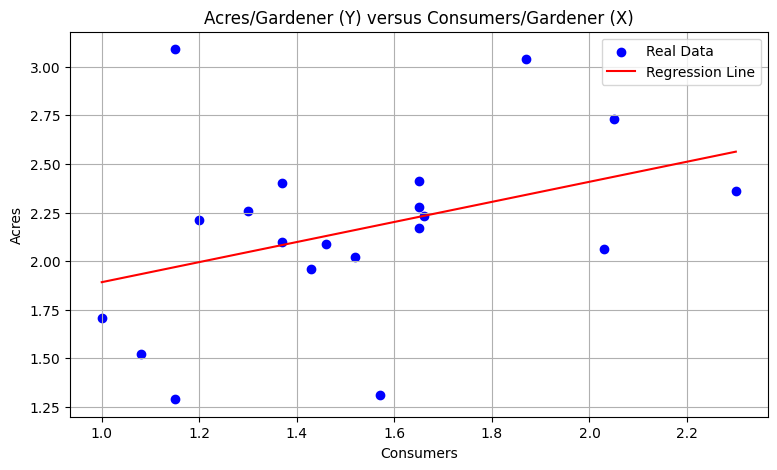

In [67]:
# Plot of the data and the corresponding Regression line
plt.figure(figsize = (9, 5))
plt.scatter(x, y, c='b', label = 'Real Data')
plt.plot(x, A_1 + B_1 * x, c = 'r', label = 'Regression Line')
plt.xlabel(colNames[0].title())
plt.ylabel(colNames[1].title())
plt.title("Acres/Gardener (Y) versus Consumers/Gardener (X)")
plt.legend()
plt.grid()
plt.show()

### Contains all household items without the fourth household

In [68]:
sahlinsData2 = sahlinsData.drop(4, axis=0)
sahlinsData2.head()

,consumers,acres
1,1.00,1.71
2,1.08,1.52
3,1.15,1.29
5,1.20,2.21
6,1.30,2.26


In [69]:
# Conversion to Numpy
x_2 = sahlinsData2[list(sahlinsData2.columns)[0]].to_numpy(dtype=np.float64) # independent variable
y_2 = sahlinsData2[list(sahlinsData2.columns)[1]].to_numpy(dtype=np.float64) # dependent variable

In [70]:
A_2, B_2, SE_2, r_2, r2_2 = linearRegression(x_2, y_2)

A = 1.0000039779982315, B = 0.7215941459581576
^y = 1.0000039779982315 + 0.7215941459581576 x
SE = 0.36807628982761764
r = 0.6030587040800304
r² = 0.3264051395667762


### $$A = 1.0000039779982313 \hspace{3em} B = 0.7215941459581577$$
### $$\widehat{y}_i = 1.0000039779982313 + 0.7215941459581577 x_i$$
### $$ S_{E} = 0.36807628982761764$$
### $$r = 0.5713187722863446$$
### $$r^2 = 0.3264051395667762$$

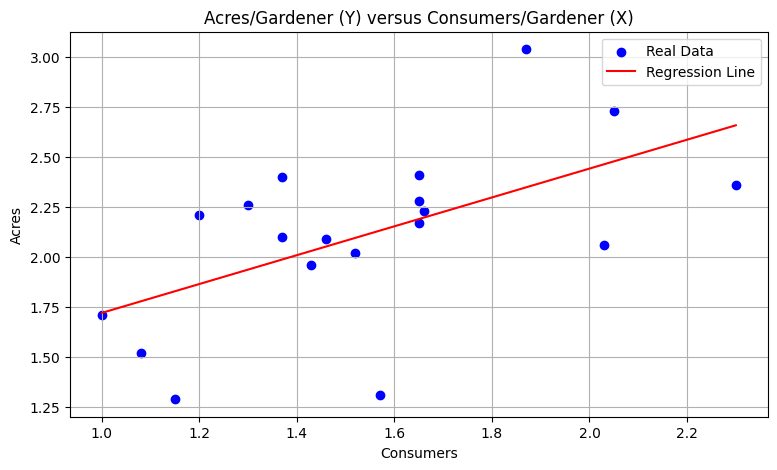

In [71]:
# Plot of the data and the corresponding Regression line
plt.figure(figsize = (9, 5))
plt.scatter(x_2, y_2, c='b', label = 'Real Data')
plt.plot(x_2, A_2 + B_2 * x_2, c = 'r', label = 'Regression Line')
plt.xlabel(colNames[0].title())
plt.ylabel(colNames[1].title())
plt.title("Acres/Gardener (Y) versus Consumers/Gardener (X)")
plt.legend()
plt.grid()
plt.show()

### __Do the results change if the fourth household is deleted?__

In [72]:
print(f"The A for all the data is {A_1}")
print(f"The A for data excluding 4th household is {A_2}")
print()
print(f"The B for all the data is {B_1}")
print(f"The B for data excluding 4th household is {B_2}")
print()
print(f"The SE for all the data is {SE_1}")
print(f"The SE for data excluding 4th household is {SE_2}")
print()
print(f"The r² for all the data is {r2_1}")
print(f"The r² for data excluding 4th household is {r2_2}")

The A for all the data is 1.3756445484797928
The A for data excluding 4th household is 1.0000039779982315

The B for all the data is 0.5163200600920598
The B for data excluding 4th household is 0.7215941459581576

The SE for all the data is 0.45431787203787166
The SE for data excluding 4th household is 0.36807628982761764

The r² for all the data is 0.14111752046957293
The r² for data excluding 4th household is 0.3264051395667762


I can see that the removal of the fourth household changes the parameters of the model, there are changes to the $A$ and the $B$ and a slight change in the $S_E$. The value of the $r^2$ more than double without the fourth household. In light of the assignment, the slope of the regression is positive and even more so without the fourth household. This demonstrates that society from the dataset has tendencies towards the free market (consumption needs).

# Task #3
### Exercise D6.2 In Exercise D5.2 you calculated a simple regression of acres/gardener on consumers/gardener for the 20 households of Mazulu village. Find the standard errors of the least-squares intercept and slope. Can we conclude that the population slope is greater than zero? Can we conclude that the intercept is greater than zero? Repeat these computations omitting the fourth household.

In [73]:
# Matrix A fro model yᵢ = A + B * xᵢ + εᵢ
X = np.concatenate((np.ones((N, 1)), x.reshape(N, 1)), axis = 1)
Y = y.reshape(N, 1)

In [74]:
print("The Normal Quations:")
print(f"XᵀX B = XᵀY\n")

# B = (XᵀX)ˉ¹XᵀY
B = np.linalg.solve(X.T @ X, X.T @ Y)

print(f"B = (XᵀX)ˉ¹XᵀY = \n{B}")

The Normal Quations:
XᵀX B = XᵀY

B = (XᵀX)ˉ¹XᵀY = 
[[1.37564455]
 [0.51632006]]


In [75]:
yhat = (X @ B).reshape(y.shape)
e = y - yhat
SSE = e.T @ e

# The variance of the residuals
SE2 = SSE / (N - 2)

# The sampling variances of A and B
Vhat_A = SE2 * (x.T @ x) / (N * (x - np.mean(x)).T @ (x - np.mean(x)))
Vhat_B = SE2 / ((x - np.mean(x)).T @ (x - np.mean(x)))

# The standard errors of A and B
SE_A = np.sqrt(Vhat_A)
SE_B = np.sqrt(Vhat_B)

In [76]:
print(f"SE_A (intercept) = {SE_A}")
print(f"SE_B (slope) = {SE_B}")

SE_A (intercept) = 0.46840467455960577
SE_B (slope) = 0.30023350016355477


In [77]:
B[0]

array([1.37564455])

#### __Standard Error of the Slope of Regression Line for all data points $= 0.30023350016355477$__
#### __Standard Error of the Intercept for all data points $= 0.46840467455960577$__

### __Can we conclude that the population slope is greater than zero?__

To answer this question it is needed to test the null hypothesis at significance level $\alpha = 0.05$ that the slope is greater than zero.

$$H_0: B = 0 \hspace{2em} H_1: B > 0$$

The test statistic:

$$ t = \frac{B}{S_E(B)}$$

In [78]:
alpha = 0.05
dof = N - 2

In [79]:
# Right-tailed
tAlpha = t.ppf(1 - alpha, dof)
print(f"t_(α, n - 2) = {tAlpha}")

t_(α, n - 2) = 1.7340636066175354


In [80]:
test_B = B[1].item() / SE_B
print(f"Test statistic for B: {test_B}")

Test statistic for B: 1.7197283441414444


#### $$ \text{Test statistic} > t_{0.05,n-2} \Rightarrow \text{Rejection } H_0$$

### <center>The conclusion is that the population slope is greater than zero.</center>

### __Can we conclude that the intercept is greater than zero?__

In [81]:
test_A = B[0].item() / SE_A
print(f"Test statistic for A: {test_A}")

Test statistic for A: 2.9368719468335227


#### $$ \text{Test statistic} > t_{0.05,n-2} \Rightarrow \text{Rejection } H_0$$

### __<center>The conclusion is that the population slope is greater than zero.</center>__

### __Repeat these computations omitting the fourth household.__

In [82]:
# Matrix A fro model yᵢ = A + B * xᵢ + εᵢ
X_2 = np.concatenate((np.ones((N - 1, 1)), x_2.reshape(N - 1, 1)), axis = 1)
Y_2 = y_2.reshape(N - 1, 1)

In [83]:
print("The Normal Quations:")
print(f"XᵀX B = XᵀY\n")

# B = (XᵀX)ˉ¹XᵀY
B_2 = np.linalg.solve(X_2.T @ X_2, X_2.T @ Y_2)

print(f"B = (XᵀX)ˉ¹XᵀY = \n{B_2}")

The Normal Quations:
XᵀX B = XᵀY

B = (XᵀX)ˉ¹XᵀY = 
[[1.00000398]
 [0.72159415]]


In [84]:
yhat_2 = (X_2 @ B_2).reshape(y_2.shape)
e_2 = y_2 - yhat_2
SSE_2 = e_2.T @ e_2

# The variance of the residuals
SE2_2 = SSE_2 / ((N-1) - 2)

# The sampling variances of A and B
Vhat_A_2 = SE2_2 * (x_2.T @ x_2) / ((N-1) * (x_2 - np.mean(x_2)).T @ (x_2 - np.mean(x_2)))
Vhat_B_2 = SE2_2 / ((x_2 - np.mean(x_2)).T @ (x_2 - np.mean(x_2)))

# The standard errors of A and B
SE_A_2 = np.sqrt(Vhat_A_2)
SE_B_2 = np.sqrt(Vhat_B_2)

In [85]:
print(f"SE_A (intercept) = {SE_A_2}")
print(f"SE_B (slope) = {SE_B_2}")

SE_A (intercept) = 0.39692535905838633
SE_B (slope) = 0.2514139832071163


#### __Standard Error of the Slope of Regression Line for all data points excluding 4th household $= 0.2514139832071163$__
#### __Standard Error of the Intercept for all data points excluding 4th household $= 0.39692535905838633$__

In [86]:
# Right-tailed
tAlpha = t.ppf(1 - alpha, N -1 - 2 )
print(f"t_(α, n - 2) = {tAlpha}")

t_(α, n - 2) = 1.7396067260750672


In [87]:
test_B = B_2[1].item() / SE_B_2
test_A = B_2[0].item() / SE_A_2

print(f"Test statistic for A: {test_A}")
print(f"Test statistic for B: {test_B}")

Test statistic for A: 2.5193753817355127
Test statistic for B: 2.8701432464228005


### __Both parameters satisfy the following condition : $\text{Test statistic} > t_{0.05,n-2}$, therefore there is the conclusion that both parameters are greater than 0.__

# Task #4

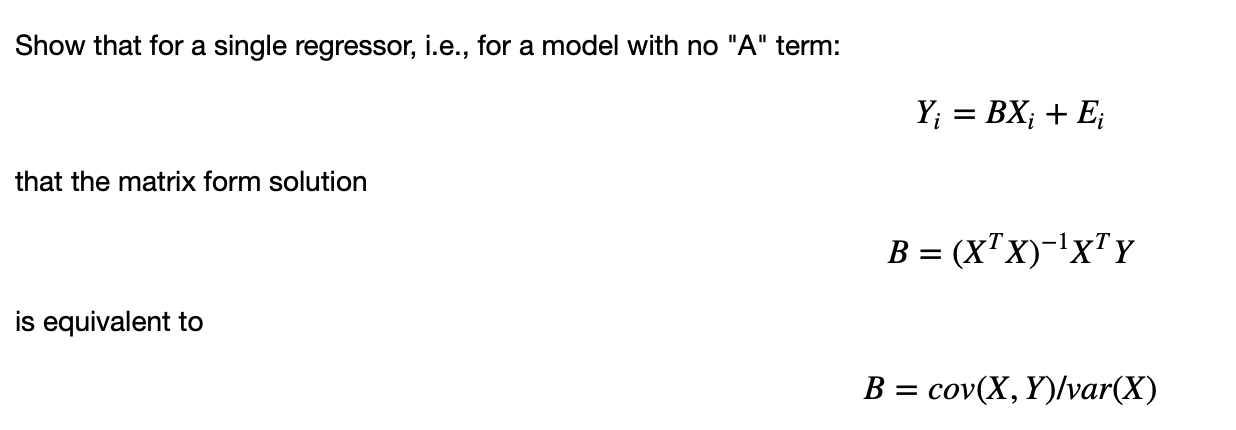

When $n > 1$ and with the assumptions $\mathbb{E}[X] = 0$ and $\mathbb{E}[Y] = 0$, the following applies:

$X = [x_1, \ldots , x_n]^T$ <br>
$Y = [y_1, \ldots , y_n]^T$ <br>

$B = \frac{cov(X, Y)}{var(X)} = \frac{\sum^n_{i=1} x_i y_i}{\sum^n_{i=1} (x_i)^2}$

The sum of squared elements is equivalent to a dot product of a vector of these elements with itself.

#### $$var(X) = \frac{1}{n-1}\sum^n_{i=1} (x_i)^2 = \frac{1}{n-1} X^TX$$

A similar argument applies to covariance.

#### $$cov(X,Y) = \frac{1}{n-1}\sum^n_{i=1} x_i y_i = \frac{1}{n-1} X^TY$$

Linear algebra does not have matrix division. This is replaced by the inverse which is applied to the denominator with the variance in this case.

#### $$B = \frac{cov(X, Y)}{var(X)} = \left( var(X) \right)^{-1} \cdot cov(X, Y) = \left( \frac{1}{n-1} \sum^n_{i=1} (x_i)^2 \right)^{-1} \cdot \left( \frac{1}{n-1} \sum^n_{i=1} x_i y_i \right) = \left( \sum^n_{i=1} (x_i)^2 \right)^{-1} \cdot \left( \sum^n_{i=1} x_i y_i \right) = (X^TX)^{-1}X^TY$$

### __The proof of the said equality was thus carried out.__